# Collation with CollateX

## Functionality, Simple Commands

* add one or more witnesses to the collation
* create a simple table (with segmentation disabled)
* print simple table

In [27]:
!pip install --upgrade collatex

Requirement already up-to-date: collatex in /anaconda/lib/python3.5/site-packages
Requirement already up-to-date: networkx in /anaconda/lib/python3.5/site-packages (from collatex)
Requirement already up-to-date: prettytable in /anaconda/lib/python3.5/site-packages (from collatex)
Requirement already up-to-date: decorator>=3.4.0 in /anaconda/lib/python3.5/site-packages (from networkx->collatex)


In [30]:
from collatex import *

In [31]:
collation = Collation()

In [32]:
collation.add_plain_witness("A", "The quick brown fox jumped over the lazy dog.")

In [33]:
collation.add_plain_witness("B", "The brown fox jumped over the dog.")

In [34]:
collation.add_plain_witness("C", "The bad fox jumped over the lazy dog.")

In [35]:
alignment_table = collate(collation, layout='vertical', segmentation=False)
#table layout vertical

In [36]:
print(alignment_table)

+--------+--------+--------+
|   A    |   B    |   C    |
+--------+--------+--------+
|  The   |  The   |  The   |
+--------+--------+--------+
| quick  |   -    |  bad   |
+--------+--------+--------+
| brown  | brown  |   -    |
+--------+--------+--------+
|  fox   |  fox   |  fox   |
+--------+--------+--------+
| jumped | jumped | jumped |
+--------+--------+--------+
|  over  |  over  |  over  |
+--------+--------+--------+
|  the   |  the   |  the   |
+--------+--------+--------+
|  lazy  |   -    |  lazy  |
+--------+--------+--------+
|  dog   |  dog   |  dog   |
+--------+--------+--------+
|   .    |   .    |   .    |
+--------+--------+--------+


In [37]:
alignment_table = collate(collation, layout='vertical')
#segmentation is on True as a default; it doesn't need to be written

In [38]:
print(alignment_table)

+---------------------+---------------------+---------------------+
|          A          |          B          |          C          |
+---------------------+---------------------+---------------------+
|         The         |         The         |         The         |
+---------------------+---------------------+---------------------+
|        quick        |          -          |         bad         |
+---------------------+---------------------+---------------------+
|        brown        |        brown        |          -          |
+---------------------+---------------------+---------------------+
| fox jumped over the | fox jumped over the | fox jumped over the |
+---------------------+---------------------+---------------------+
|         lazy        |          -          |         lazy        |
+---------------------+---------------------+---------------------+
|         dog.        |         dog.        |         dog.        |
+---------------------+---------------------+---

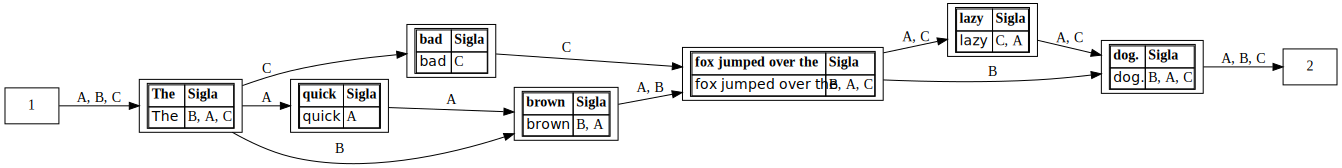

In [39]:
graph = collate(collation, output='svg', segmentation=True)
#segmentation is set on True by default, doesn't need to be spelled out
#it is not necessary and in fact creates an error if the print statement is put here. graph does make a graph!

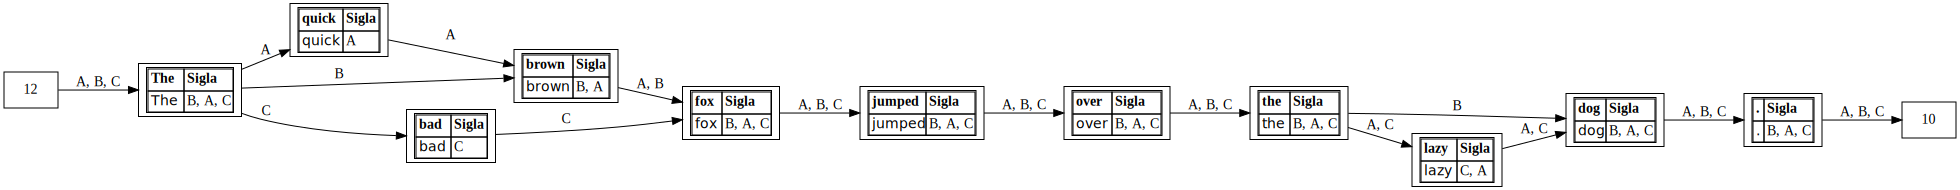

In [40]:
graph = collate(collation, output='svg', segmentation=False)

# Tutorial 2

## Code and Collation Workshop

Trying out Near Matching as implemented in CollateX, using a piece of code from the class material.

+---+-----+-----+-------+-------+
| A | The | -   | gray  | koala |
| B | The | big | grey  | koala |
| D | The | bad | black | koala |
+---+-----+-----+-------+-------+


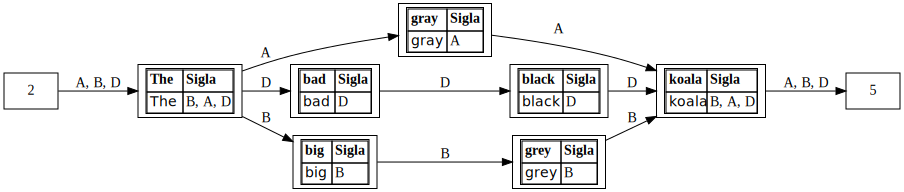

In [41]:
from collatex import *
collation = Collation()
collation.add_plain_witness("A", "The gray koala")
collation.add_plain_witness("B", "The big grey koala")
#collation.add_plain_witness("C", "The bag grey koala")
collation.add_plain_witness("D", "The bad black koala")
alignment_table = collate(collation, segmentation=False, near_match=True)
print(alignment_table)
graph = collate(collation, near_match=True, segmentation=False, output='svg')

# Experimenting with material from the Ethica Complementoria project

#### Goal: Collate the first paragraph of the Vorrede an den Leser of the witnesses A1 (1643), A2 (1643–1647), B6 (1660), and C3 (1665)

The Following code example ingests the 4 txt-files that contain plain text of the 1st paragraph of the Vorrede of four witnesses. It then collates them with each other. The output is an HTML-table.

The Tokenization is set to default (not changes have been made), which means in this case that it splits the string at all whitespaces and before every punctuation sign.

As a result of the encoding using letters for special characters in the original rather than correct Unicode encoding, in some cases the e-superscript or o-superscript are considered as a token.

This problem needs to be tackled with either (1) normalization or (2) a different kind of / customized tokenization.

For this test-case the special characters with superscript have been manually removed.

For different output use segmentation=False, near_match=True when printing a graph and/or printing an HTML-table.
If this is not set, it will not do segmentation but visualize the collation with only the differences, not token-by-token!

In [47]:
from collatex import *
collation = Collation()
print_A1 = open( "../transcriptions/test_material/A1_vorrede_p1.txt", encoding='utf-8' ).read()
print_A2 = open( "../transcriptions/test_material/A2_vorrede_p1.txt", encoding='utf-8' ).read()
print_B2 = open( "../transcriptions/test_material/B2_vorrede_p1.txt", encoding='utf-8' ).read()
print_B3 = open( "../transcriptions/test_material/B3_vorrede_p1.txt", encoding='utf-8' ).read()
print_B4 = open( "../transcriptions/test_material/B4_vorrede_p1.txt", encoding='utf-8' ).read()
print_B6 = open( "../transcriptions/test_material/B6_vorrede_p1.txt", encoding='utf-8' ).read()
print_C1 = open( "../transcriptions/test_material/C1_vorrede_p1.txt", encoding='utf-8' ).read()
print_C3 = open( "../transcriptions/test_material/C3_vorrede_p1.txt", encoding='utf-8' ).read()
print_C5 = open( "../transcriptions/test_material/C5_vorrede_p1.txt", encoding='utf-8' ).read()
collation.add_plain_witness( "A1", print_A1 )
collation.add_plain_witness( "A2", print_A2 )
collation.add_plain_witness( "B2", print_B2 )
collation.add_plain_witness( "B3", print_B3 )
collation.add_plain_witness( "B4", print_B4 )
collation.add_plain_witness( "B6", print_B6 )
collation.add_plain_witness( "C1", print_C1 )
collation.add_plain_witness( "C3", print_C3 )
collation.add_plain_witness( "C5", print_C5 )
table = collate(collation, segmentation=False, near_match=True, output='html2')
#if the near_match argument is to be used, then the segmentation has to be set to False;
#if it is not used, the segmentation should be set to True to enable segmentation
#graph = collate(collation, output='svg')

#### Writing files for the output

BUG::: In order to actually write the file (not just a file name with no content in the file), execute the line of code twice!

Tried writing something else than an xml-output into a file: doesn't work for .txt, comes back with error message.
Code was used from the lesson material and changed from .xml to .txt. Same problem for html. Turns out that CollateX doesn't support this kind of file output.

Possible circumvention would be to create a csv-workaround. Csv-module needs to be implemented then.

Alternatively, try simple Python commands to create a list of tokens (default tokenization) and import that into a spreadsheet.



In [45]:
#this will not create a file with any content!!
#the issue is solved below, unconventionally…
from collatex import *
collation = Collation()
print_A1 = open( "../transcriptions/test_material/A1_vorrede_p1.txt", encoding='utf-8' ).read()
print_A2 = open( "../transcriptions/test_material/A2_vorrede_p1.txt", encoding='utf-8' ).read()
outfile = open('outfile.html', 'w', encoding='utf-8')
collation.add_plain_witness( "A1", print_A1 )
collation.add_plain_witness( "A2", print_A2 )
table = collate(collation, segmentation=False, output='html')
print(table, file=outfile)

A1,An,den,guenſtigen,Leſer,.,DEmnach,der,Author,geſpueret,/,daß,diß,Buechlein,von,vornehmen,-,verſtaendigen,Leuten,/,denen,es,privatim,ertheilet,/,ſehr,beliebet,/,Es,aber,deß,Abſchreibens,halber,mehr,ſchwer,als,dienlich,angeſtanden,/,als,hat,mans,dem,gemeinen,Nutzen,/,auff,dero,anhalten,/,endlich,zum,Druck,verfertigen,wollen,/,Nicht,groß,Anſehen,dadurch,zu,erjagen,/,Sondern,daß,maenniglich,Anleitung,hette,/,ſich,bey,Leuten,ſo,wol,mit,Worten,als,Thaten,vorſichtig,-,vnaergerlich,in,Ehr,vnd,Rhume,zuverhalten,-,/,damit,man,von,anderen,Spitzkoepfen,nit,aufgezogen,/,oder,wol,gaꝛ,untergangen,werde,/,weil,ja,/,leider,/,das,verba,dare,-,jetzt,gebraeuchlicher,vnd,politiſcher,heiſſet,/,als,verba,facere,.
A2,An,den,guonſtigen,Leſer,.,DEmnach,der,Autor,geſpueret,/,daß,diß,Buechlein,von,vornemen,/,verſtaendigen,Leuten,/,denen,es,privatim,ertheilet,/,ſehr,beliebet,/,es,aber,deß,Abſchreibens,halber,mehr,ſchwer,als,dienlich,angeſtanden,/,als,hat,mans,dem,gemeinen,Nutzen,/,auff,dero,anhalten,/,endlich,zum,Truck,verfertigen,wollen,/,nicht,groß,anſehen,dardurch,zu,erjagen,/,ſondern,daß,maenniglich,anleytung,hette,/,ſich,bey,Leuten,ſo,wol,mit,Worten,als,Thaten,vorſichtig,/,vnaergerlich,in,Ehr,vnd,Ruhm,zu,verhalten,/,damit,man,von,andern,Spitzkoepffen,nicht,auffgezogen,/,oder,wol,gar,hindergangen,werde,/,weil,ja,/,leyder,/,das,verba,dare,",",jetzt,gebraeuchlicher,vnd,politiſcher,heiſſet,/,als,verba,facere,.


## Collation of Witnesses from the B-group (Hamburg, Naumann)

### Overview over collated witnesses

* B1 (1647) -- Complementierbüchlein, 1st issue Johann Naumann, HH
* B2 (1648) -- Complementierbüchlein in Löfflerey-Kunst (unknown printer, unknown place)
* B3 (1649) -- Complementierbüchlein, 2nd issue Johann Naumann, HH
* B4 (1654) -- Complementierbüchlein, 3rd issue Johann Naumann, HH
* B6 (1660) -- Complementierbüchlein, 5th issue Johann Naumann, HH (last of the Naumann-prints)

### Specification

Only the first paragraph of the Vorrede an den Leser is collated.

The texts have been manually transcribed in plain text and saved to a txt-file.

### (Dirty) solution to ugly problem!!!

If you want to get the collated data from the jupyter notebook html table into an excel or other spreadsheet:

1. enable developer mode in Chrome
2. click on developer tools
3. a window opens that shows the html encoding of the notebook (right upper side)
4. navigate to the table (works by jumping through the tree structure; tables are called 'table'
5. right-click on the table tag, click "Edit as HTML"
6. copy-and-paste the content of the table into any spreadsheet

In [42]:
from collatex import *
collation = Collation()
print_B1 = open( "../transcriptions/test_material/B1_vorrede_p1.txt", encoding='utf-8' ).read()
print_B2 = open( "../transcriptions/test_material/B2_vorrede_p1.txt", encoding='utf-8' ).read()
print_B3 = open( "../transcriptions/test_material/B3_vorrede_p1.txt", encoding='utf-8' ).read()
print_B4 = open( "../transcriptions/test_material/B4_vorrede_p1.txt", encoding='utf-8' ).read()
print_B6 = open( "../transcriptions/test_material/B6_vorrede_p1.txt", encoding='utf-8' ).read()
collation.add_plain_witness( "B1", print_B1 )
collation.add_plain_witness( "B2", print_B2 )
collation.add_plain_witness( "B3", print_B3 )
collation.add_plain_witness( "B4", print_B4 )
collation.add_plain_witness( "B6", print_B6 )
table = collate(collation, segmentation=False, near_match=True, output='html')
graph = collate(collation, segmentation=False, near_match=True, output='svg')

B1,An,den,guenſtigen,Leſer,.,DEmnach,der,Author,geſpueret,/,daß,diß,Buechlein,von,vornehmen,verſtaendigen,Leuten,/,denen,es,privatim,ertheilet,/,ſehr,beliebet,/,Es,aber,deß,Abſchreibens,halber,mehr,ſchwer,als,dienlich,angeſtanden,/,als,hat,mans,-,dem,gemeinen,Nutzen,/,auff,dero,anhalten,/,endlich,zum,Druck,verfertigen,wollen,/,nicht,groß,Anſehen,dadurch,zu,erjagen,/,ſondern,daß,maenniglich,Anleitung,hette,/,ſich,bey,Leuten,ſo,wol,mit,Worten,als,mit,Thaten,vorſichtig,vnaergerlich,in,Ehr,vnd,Ruhm,zuverhalten,-,/,damit,man,von,anderen,Spitzkoepfen,nit,auffgezogen,/,oder,wol,gar,hintergangen,werde,/,weil,ja,/,leider,/,das,verba,dare,jetzt,gebraeuchlicher,vnd,politiſcher,heiſſet,/,als,verba,facere,.,Es,iſt,nicht,alles,Gold,was,nach,dem,Golde,ſcheint,;,Es,redet,manches,Mund,/,was,ſein,Hertz,anders,meint,.
B2,An,den,guetigen,Leſer,.,DEmnach,der,Author,geſpueret,/,daß,diß,Buechlein,von,vornehmen,verſtaendigen,Leuthen,/,denen,es,privatim,ertheilet,/,ſehr,beliebet,/,Es,aber,deß,Abſchreibens,halber,mehr,ſchwer,als,dienlich,angeſtanden,/,als,hat,mans,-,dem,gemeinen,Nutzen,/,auff,derp,Anhalten,/,endich,zu,Druck,verfertigen,wollen,/,nit,groß,Anſehen,dadurch,-,zuerjagen,/,ſondeꝛ,dz,maenniglich,Anleitung,hette,-,ſich,bey,Leuten,ſo,wol,mit,Worten,als,mit,Thaten,vorſichtig,vnaergerlich,in,Ehr,vnnd,Ruhm,zuverhalten,-,/,damit,man,von,andern,Spitzkoepffen,nit,auffgezogen,/,oder,wol,gar,hindergangen,werde,/,weil,ja,/,leyder,/,das,verba,dare,jetzt,gebraeuchlicher,vnnd,Politiſcher,heiſſet,/,als,verba,facere,.,Es,iſt,nit,alles,Gold,was,nach,dem,Golde,ſcheint,;,Es,redet,mancher,Mund,/,was,ſein,Herꝛ,anders,meynt,.
B3,An,den,guenſtigen,Leſer,.,DEmnach,der,Author,geſpueret,/,daß,diß,Buechlein,von,vornehmen,vorſtaendigen,Leuten,/,denen,es,privatim,ertheilet,/,ſehꝛ,beliebet,/,Es,aber,deß,Abſchreibens,halber,mehr,ſchwer,als,dienlich,angeſtanden,/,als,hat,mans,-,den,gemeinen,Nutzen,/,auff,dero,anhalten,-,endlich,zum,Druck,verfertigen,wollen,/,nicht,groß,Anſehen,dadurch,zu,erjagen,/,ſondern,daß,maenniglich,Anleitung,hette,/,ſich,bey,Leuten,ſo,wol,mit,Worten,als,mit,Thaten,vorſichtig,vnaergerlich,in,Ehr,und,Ruhm,zuerhalten,-,/,damit,man,von,andern,Spitzkoepffē,nicht,auffgezogen,/,oder,wol,gar,hintergangen,werde,/,weil,ja,/,leider,/,das,verba,dare,jetzt,gebraeuchlicher,und,politiſcher,heiſſet,/,als,verba,facere,.,Es,iſt,nicht,alles,Gold,was,nach,dem,Golde,ſcheint,;,Es,redet,mancher,Mund,/,was,ſein,Hertz,anders,meint,.
B4,An,den,guenſtigen,Leſer,.,DEmnach,der,Author,geſpueret,/,daß,diß,Buechlein,von,vornehmen,verſtaendigen,Leuten,/,denen,es,privatim,ertheilet,/,ſehꝛ,beliebet,/,Es,abeꝛ,des,Abſchreibens,halber,mehr,ſchwer,als,dienlich,angeſtanden,/,als,hat,man,-,den,gemeinen,Nutzen,/,auff,dero,Anhalten,-,endlich,zum,Druck,verfertigen,wollen,/,nicht,groß,Anſehen,dadurch,zu,erjagen,/,ſondern,daß,maenniglich,Anleitung,haette,/,ſich,bey,Leuten,ſo,wol,mit,Worten,als,mit,Thaten,vorſichtig,unaergerlich,in,Ehr,und,Ruhm,zu,erhalten,/,damit,man,von,andern,Spitzkoepffen,nicht,auffgezogen,/,oder,wol,gar,hintergangen,werde,/,weil,ja,/,leider,/,das,verba,dare,jetzt,gebraeuchlicher,und,politiſcher,heiſſet,/,als,verba,facere,.,Es,iſt,nicht,alles,Gold,was,nach,dem,Golde,ſcheint,;,Es,redet,mancher,Mund,/,was,ſein,Hertz,anders,meint,.
B6,An,den,guenſtigen,Leſer,.,DEmnach,der,Author,geſpueret,/,daß,diß,Buechlein,von,vornehmen,verſtaendigen,Leuten,/,denen,es,privatim,ertheilt,/,ſehr,beliebet,/,es,aber,deß,Abſchreibens,halber,-,-,-,-,-,/,als,hat,man,es,den,gemeinen,Nutzen,/,auff,dero,Anhalten,-,endlich,zum,Druck,verfertigen,wollen,/,nicht,groß,Anſehen,dardurch,zu,erjagen,/,ſondern,daß,maenniglich,Anleitung,haette,/,ſich,bey,Leuten,ſo,wol,mit,Worten,als,mit,Thaten,vorſichtig,unaergerlich,in,Ehr,uñ,Ruhm,zu,veꝛhalten,/,damit,man,von,andern,Spitzkoepffen,nicht,auffgezogen,-,oder,wol,gar,hintergangen,werde,/,weil,ja,/,leider,/,das,verba,dare,jetz,gebraeuchlicher,und,politiſcher,heiſſet,/,als,verba,facere,.,Es,iſt,nicht,alles,Gold,was,nach,dem,Golde,ſcheint,;,Es,redet,mancher,Mund,/,was,ſein,

## Tasks for the future!

1. create a simple list of all tokens with Python. This can be done prior to the collation with a simple Python script (probably using regular expressions)
2. sort the list alphabetically
3. I want to create an index of all words in all variations for the individual texts to get an overview of what I have to deal with
4. while we're at it: make a list sortet by word-frequency! This will gather all the function words as well as unique words – this could be useful for determining accidental and substantive variation
5. Do a collation! !
